In [63]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
street_map = gpd.read_file('geo_export_e84afd90-db1a-4674-9a73-a5630ce6338d.shp')
import contextily as ctx

In [11]:
df = pd.read_csv("nyc_italian.csv", encoding="ISO-8859-1")

In [12]:
df.head()

,Case,Restaurant,Price,Food,Decor,Service,East,latitude,longitude
0,1,Daniella Ristorante,43,22,18,20,0,40.746831,-73.996758
1,2,Tello's Ristorante,32,20,19,19,0,40.743421,-73.999537
2,3,Biricchino,34,21,13,18,0,40.748864,-73.995519
3,4,Bottino,41,20,20,17,0,40.748485,-74.003313
4,5,Da Umberto,54,24,19,21,0,40.739581,-73.995910


In [30]:
df.describe()

,Case,Price,Food,Decor,Service,East,latitude,longitude
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000
mean,84.500000,42.696429,20.595238,17.690476,19.39881,0.630952,40.762254,-73.973929
std,48.641546,9.292814,1.982674,2.702743,2.11394,0.483989,0.015397,0.014968
min,1.000000,19.000000,16.000000,6.000000,14.00000,0.000000,40.705329,-74.008362
25%,42.750000,36.000000,19.000000,16.000000,18.00000,0.000000,40.755288,-73.984987
50%,84.500000,43.000000,20.500000,18.000000,20.00000,1.000000,40.762514,-73.974906
75%,126.250000,50.000000,22.000000,19.000000,21.00000,1.000000,40.773185,-73.961381
max,168.000000,65.000000,25.000000,25.000000,24.00000,1.000000,40.801483,-73.934188


In [105]:
df['dollarsign'] = df['Price'].apply(lambda x: 1 if x<36 else (3 if x>50 else 2))
df['foodquality'] = df['Food'].apply(lambda x: 1 if x<19 else (3 if x>22 else 2))
df['decorquality'] = df['Decor'].apply(lambda x: 1 if x<16 else (3 if x>19 else 2))
df['servicequality'] = df['Service'].apply(lambda x: 1 if x<18 else (3 if x>21 else 2))



In [106]:
df.head()

,Case,Restaurant,Price,Food,Decor,Service,East,latitude,longitude,geometry,dollarsign,foodquality,decorquality,servicequality
0,1,Daniella Ristorante,43,22,18,20,0,40.746831,-73.996758,POINT (-73.99676 40.74683),2,2,2,2
1,2,Tello's Ristorante,32,20,19,19,0,40.743421,-73.999537,POINT (-73.99954 40.74342),1,2,2,2
2,3,Biricchino,34,21,13,18,0,40.748864,-73.995519,POINT (-73.99552 40.74886),1,2,1,2
3,4,Bottino,41,20,20,17,0,40.748485,-74.003313,POINT (-74.00331 40.74848),2,2,3,1
4,5,Da Umberto,54,24,19,21,0,40.739581,-73.995910,POINT (-73.99591 40.73958),3,3,2,2


In [107]:
df.to_csv('nyc_italian_v2.csv')

In [98]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

In [99]:
geo_df.head()

,Case,Restaurant,Price,Food,Decor,Service,East,latitude,longitude,geometry,dollarsign
0,1,Daniella Ristorante,43,22,18,20,0,40.746831,-73.996758,POINT (-73.99676 40.74683),2
1,2,Tello's Ristorante,32,20,19,19,0,40.743421,-73.999537,POINT (-73.99954 40.74342),1
2,3,Biricchino,34,21,13,18,0,40.748864,-73.995519,POINT (-73.99552 40.74886),1
3,4,Bottino,41,20,20,17,0,40.748485,-74.003313,POINT (-74.00331 40.74848),2
4,5,Da Umberto,54,24,19,21,0,40.739581,-73.995910,POINT (-73.99591 40.73958),3


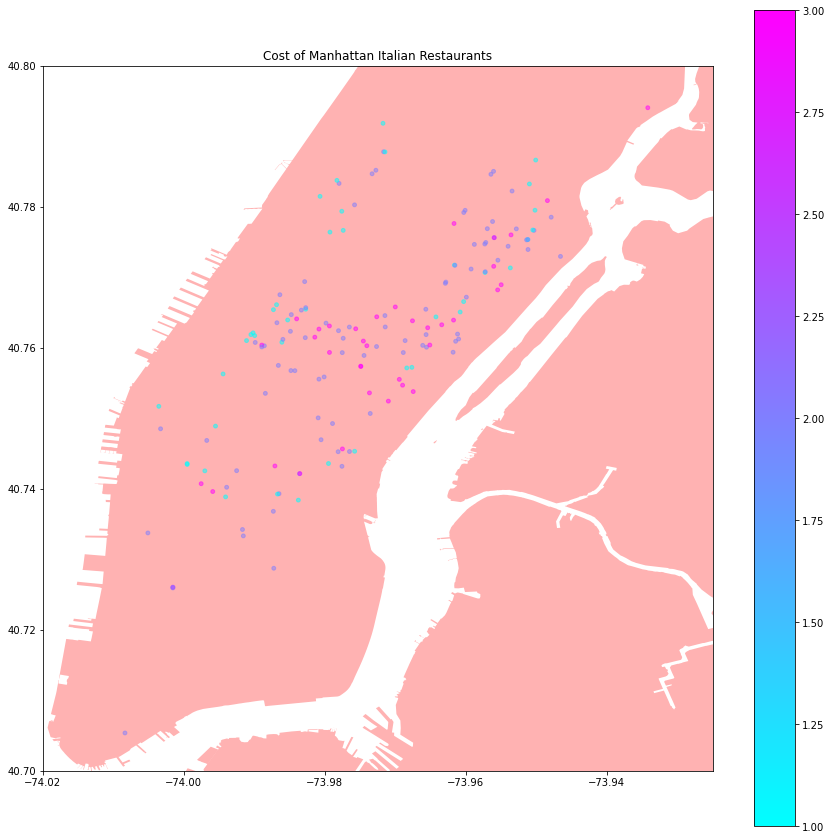

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.3, color='red')
geo_df.plot(column='dollarsign', ax=ax,alpha=0.5, legend=True,markersize=15, cmap='cool')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.title('Cost of Manhattan Italian Restaurants')
plt.show()


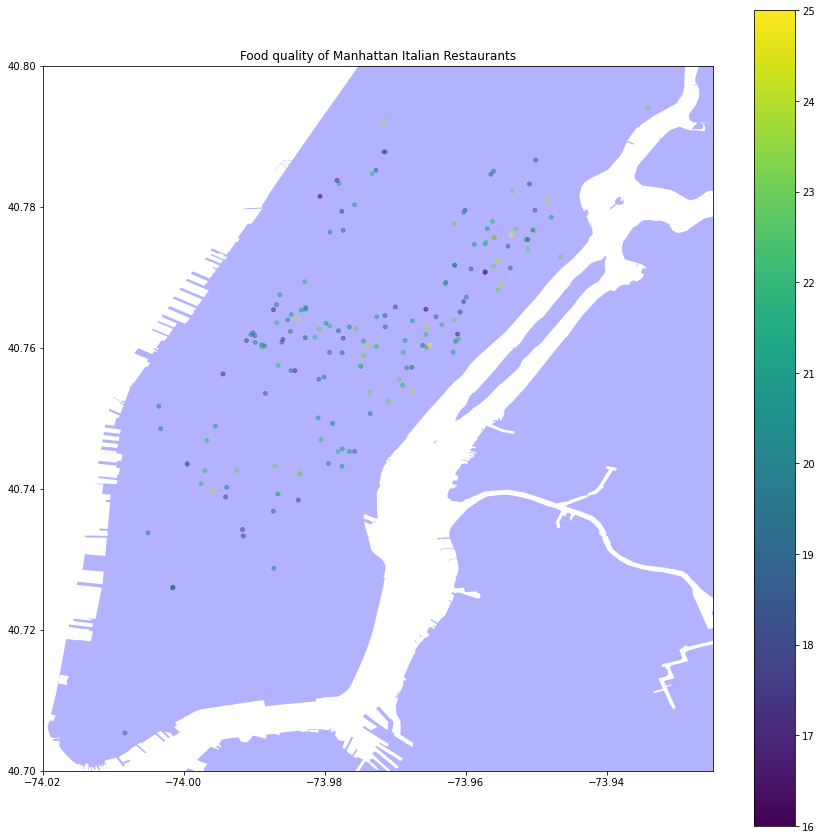

In [59]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.3, color='blue')
geo_df.plot(column='Food', ax=ax,alpha=0.5, legend=True,markersize=15)
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.title('Food quality of Manhattan Italian Restaurants')
plt.show()

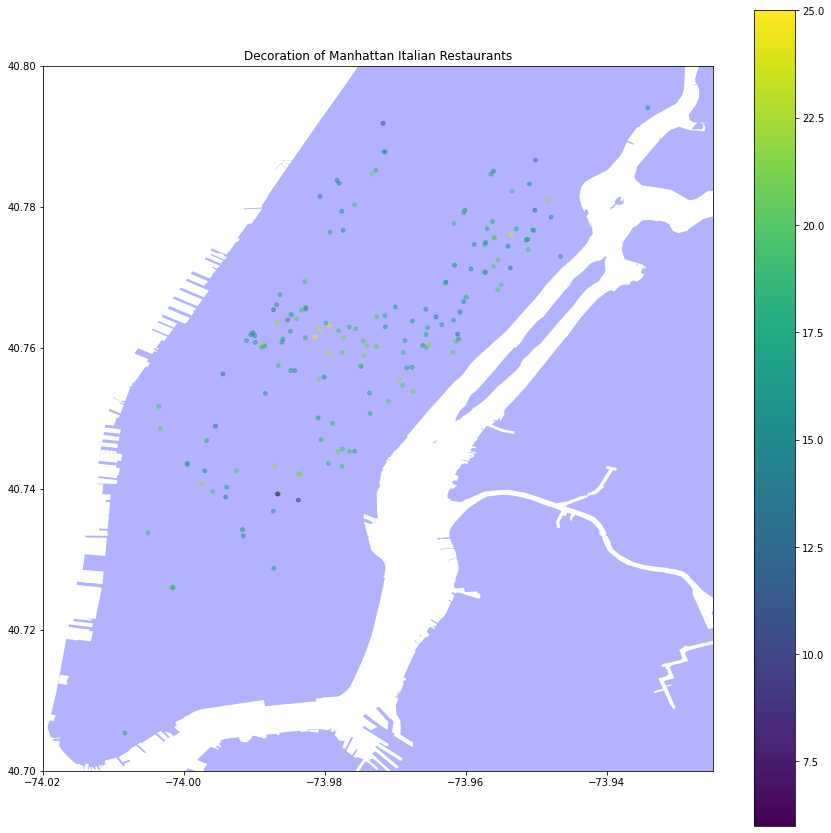

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.3, color='blue')
geo_df.plot(column='Decor', ax=ax,alpha=0.5, legend=True,markersize=15)
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.title('Decoration of Manhattan Italian Restaurants')
plt.show()

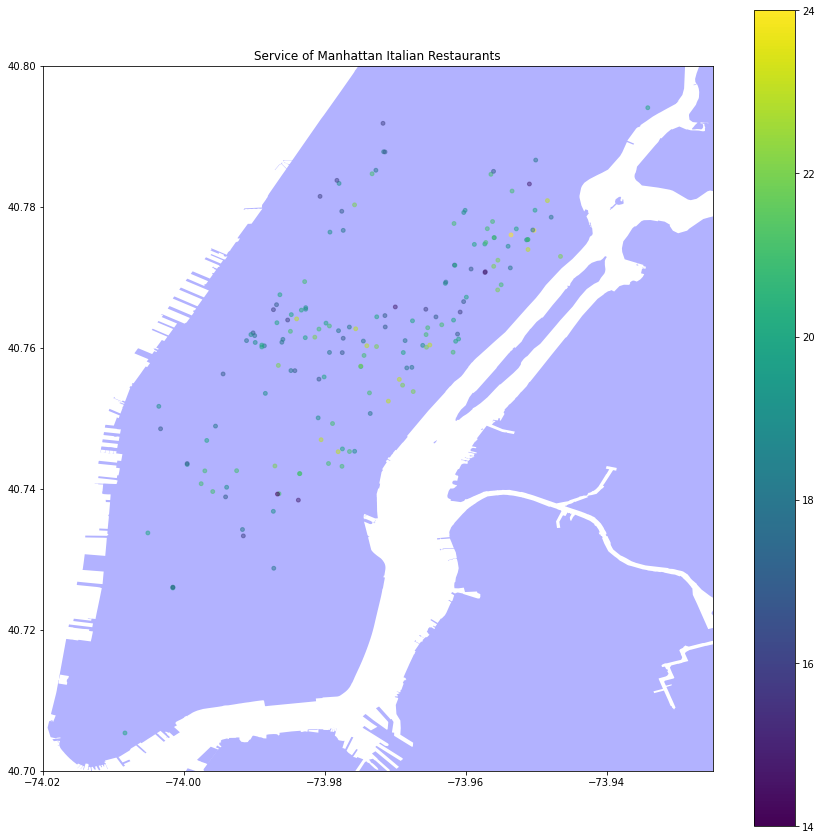

In [61]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.3, color='blue')
geo_df.plot(column='Service', ax=ax,alpha=0.5, legend=True,markersize=15)
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.title('Service of Manhattan Italian Restaurants')
plt.show()